 ## **Machine Learning Algorithm**

## **Type**: UnSupervised Machine Learning 

## **Day 7**:K-Means Clustering

## **Student**: Muhammad Shafiq

-------------------------------------------

# **What is Clustering?**

- **Definition**: Clustering is the task of grouping similar data points together without predefined labels.

- Unlike supervised learning, where we have X (features) + Y (labels), clustering only has X (features).

- **Goal**: Find hidden structure in unlabeled data.

####  **Example:**

- You run an e-commerce store → You have 1M customers with attributes (age, income, spending habits).

- No labels (like "premium customer" or "budget customer").

- Clustering can automatically discover groups:

  - Cluster 1: High income, high spenders → "Premium customers"

  - Cluster 2: Low income, low spenders → "Budget customers"

  - Cluster 3: Young, moderate spenders → "Future potential customers"

## **Why K-Means?**

- Simplicity → One of the most widely used clustering algorithms.

- Speed → Works fast even on large datasets.

- Interpretability → Easy to explain to non-technical people (e.g., business stakeholders).

### **Real-Life Applications**:

1. **Customer Segmentation** → Marketing personalization.

2. **Image Compression** → Reduce colors in an image by grouping pixels.

3. **Document Clustering** → Group similar news articles / research papers.

4. **Anomaly Detection** → Outliers = points that don’t belong to any cluster.

5. **Recommender Systems** → Group similar users or products.

### **Intuition of K-Means**

Imagine you have points on a 2D plane (scatter plot):

1. You decide number of clusters (K) you want. Example: K=3.

2. Algorithm randomly places K points (centroids) in space.

3. Each data point is assigned to its nearest centroid → forms clusters.

4. Centroids are updated (moved to the average of points in cluster).

5. Repeat until centroids stop moving → final clusters formed.

 #### **Visual**:

Think of K-Means like magnet points (centroids) pulling data points toward them.
With each iteration, magnets move slightly until they perfectly balance between their attracted points.

## **Strengths & Weaknesses**

### **✅ Strengths:**

- Very fast and scalable (O(n × k × d)).

- Works well when clusters are spherical & well-separated.

- Easy to implement & explain.

### **Weaknesses**:

- Must predefine K (number of clusters).

- Sensitive to initialization (can get stuck in local minima).

- Assumes clusters are convex & equally sized (fails on irregular shapes).

- Outliers can heavily affect centroids.

## **Business Example (Non-Technical Explanation)**

- A retail company has 1M customers.

- They want to run targeted ads.

- Running one ad campaign for all customers → very costly.

- If we use K-Means with K=4, clusters could be:

   - Group 1: Young students → Ad: cheap fashion deals.

   - Group 2: Working professionals → Ad: office wear.

   - Group 3: Families → Ad: household items.

   - Group 4: Retired people → Ad: healthcare products.

👉 This saves millions in ad spend and improves conversions.

### **Quick Visualization**


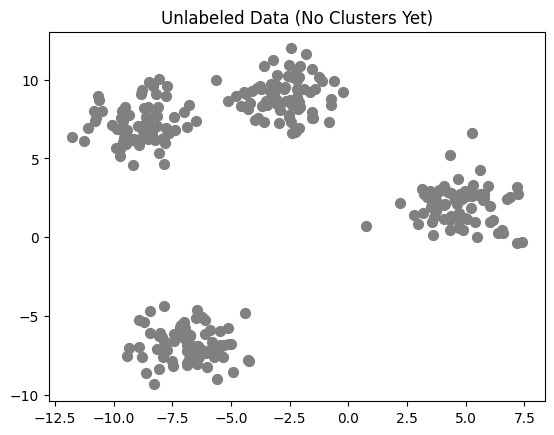

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd


# Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.2)

plt.scatter(X[:, 0], X[:, 1], s=50, c='gray')
plt.title("Unlabeled Data (No Clusters Yet)")
plt.show()

---------------------------------------

## **Mathematics Behind K-Means**

#### **Objective of K-Means**

The goal is to find **K clusters** such that points inside each cluster are as colse to each other as possible and as far from other cluster as possible.

Formally, we want to minimize the Within-Cluster sum of Squares(WCSS):

                  J = ∑^k i=1 ∑||x - μi ||2

Where:

      𝐶𝑖= cluster i
      𝜇𝑖= centroid (mean) of cluster i
      x = a data point        
         

### **The K-Means Algorithm (Step-by-Step)**

This is called Lloyd’s Algorithm:

1. **Initialize** K cluster centroids (random or k-means++).

2. **Assign Step**: Each data point goes to the nearest centroid (using Euclidean distance).

           Assign(x)=argimin​∥x−μi​∥

3. **Update Step**: Recalculate centroids as the mean of all assigned points.       

            μi​=∣Ci​∣1​x∈Ci​∑​x

4. Repeat Steps 2 & 3 until centroids don't move much (convergence).            

### **Convergence & Complexity**

- K-Means always converges (since cost function J decreases with each step).

- But it may converge to a local minimum (not guaranteed global best).

- **Time Complexity**:


                O(n×k×d×i)

n = number of data points

k = clusters

d = dimensions

i = iterations

 That’s why it’s fast compared to other clustering algorithms.

### **Choosing K (How Many Clusters?)**

Since K must be predefined, we use techniques:

1. **Elbow Method** – Plot cost function (WCSS) vs K → look for the "elbow point."

2. **Silhouette Score** – Measures how well each point fits within its cluster vs other clusters.

             s=b - a /max(a,b)

	​
- a = average intra-cluster distance

- b = average nearest-cluster distance

- Range: -1 → +1 (higher = better).

### **Small Example (Manual Calculation)**

Dataset (2D points):



In [ ]:
X1 = (1,1)
X2 = (2,1)
X3 = (4,3)
X4 = (5,4)


Suppose K=2, and we randomly initialize centroids:
C1 = (1,1), C2 = (5,4)

##### **Step 1 – Assignment:**

- X1 → nearest to C1

- X2 → nearest to C1

- X3 → nearest to C2

- X4 → nearest to C2

Clusters:
C1 = {X1, X2}
C2 = {X3, X4}

##### **Step 2 – Update Centroids:**

- New C1 = mean of {(1,1), (2,1)} = (1.5, 1)

- New C2 = mean of {(4,3), (5,4)} = (4.5, 3.5)

##### **Step 3 – Repeat**

Re-assign points → still the same clusters → converged! 

### **Implementing K-Means from scratch(NumPy)**

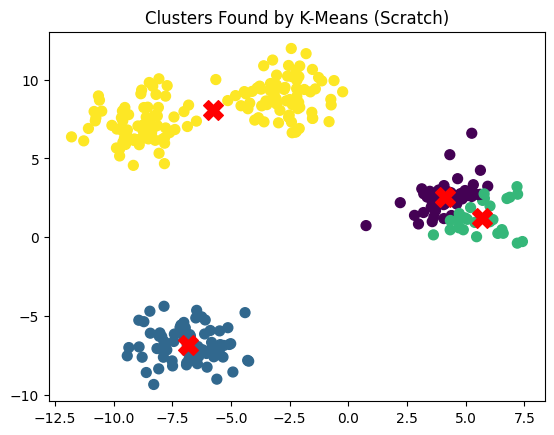

In [5]:
import numpy as np
from sklearn.datasets import make_blobs

def initialize_centroids(X, k):
    """Randomly initialize centroids"""
    np.random.seed(42)
    random_idx = np.random.permutation(X.shape[0])
    return X[random_idx[:k]]

def closest_centroid(X, centroids):
    """Assign points to the nearest centroid"""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def compute_centroids(X, labels, k):
    """Recompute centroids as mean of assigned points"""
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k, iterations=100):
    centroids = initialize_centroids(X, k)
    for _ in range(iterations):
        labels = closest_centroid(X, centroids)
        new_centroids = compute_centroids(X, labels, k)
        # Stop if converged
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Run K-

X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.2, random_state=42)
k = 4
centroids, labels = kmeans(X, k)

# Plot result
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title("Clusters Found by K-Means (Scratch)")
plt.show()


### **K - Means with Scikit-Learn**


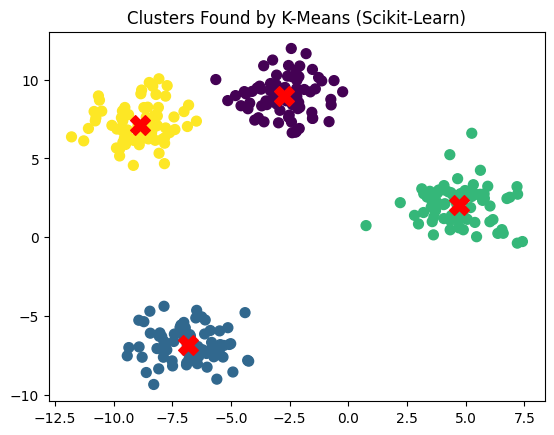

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200)
plt.title("Clusters Found by K-Means (Scikit-Learn)")
plt.show()


### **Inertia(WCSS)**

In [7]:
print("Inertia (WCSS): ", kmeans.inertia_)

Inertia (WCSS):  805.4769766778327


### **Silhouette Score**

In [9]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_kmeans)
print("silhouette_score:", score)

silhouette_score: 0.7518318432861294


### **Example On Real Dataset(Iris)**

Cluster Center:  [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
Inertia:  78.85566582597731


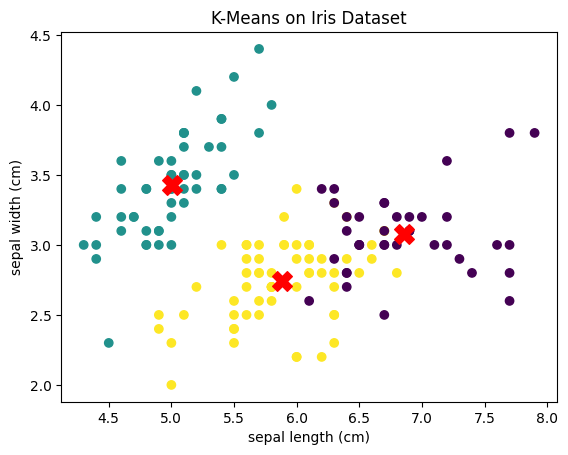

In [12]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

print("Cluster Center: ", kmeans.cluster_centers_)
print("Inertia: ", kmeans.inertia_)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker="X", s=200)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-Means on Iris Dataset")
plt.show()

### **K-Means on Real World Project + Scaling**

##### **Business Problem**

A retail company has customer data with features:

- Age

- Annual Income

- Spending Score (based on purchase behavior)

Goal: **Segment** customers into groups so marketing team can target them with personalized campaigns.

### **load DAtaset**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# load dataset
df = pd.read_csv("../dataset/mall_customers.csv")
print(df.head())
print(df.info)

   CustomerID  Gender  Age  Annual Income (USD)  Spending Score (1-100)
0           1    Male   38                76886                      26
1           2  Female   49                90745                      29
2           3    Male   40                98251                      21
3           4    Male   50                68413                      11
4           5    Male   20                71800                      40
<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (USD)  Spending Score (1-100)
0             1    Male   38                76886                      26
1             2  Female   49                90745                      29
2             3    Male   40                98251                      21
3             4    Male   50                68413                      11
4             5    Male   20                71800                      40
..          ...     ...  ...                  ...                     ...
495         496   

In [19]:
# Select Features
X = df[["Annual Income (USD)", "Spending Score (1-100)"]]

In [21]:
# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 8.04543224e-01 -8.56340093e-01]
 [ 1.34877534e+00 -7.53751630e-01]
 [ 1.64353011e+00 -1.02732086e+00]
 [ 4.71815123e-01 -1.36928241e+00]
 [ 6.04819971e-01 -3.77593934e-01]
 [ 3.61231271e-02 -1.36928241e+00]
 [ 1.12996725e+00 -5.14378551e-01]
 [ 1.13848867e+00  2.72132995e-01]
 [ 4.29247288e-01 -4.11790089e-01]
 [ 6.63604265e-02  1.63997916e+00]
 [-6.23248073e-02  1.01152224e-01]
 [ 5.52945331e-01  1.60578301e+00]
 [-8.41740285e-01  1.35348378e-01]
 [ 5.38965489e-01 -9.24732401e-01]
 [ 1.25971275e+00 -9.93124710e-01]
 [-1.06066619e+00  6.14094537e-01]
 [-1.40698144e+00  1.69544532e-01]
 [ 1.11673352e+00 -6.16967014e-01]
 [-1.88968042e-01 -5.14378551e-01]
 [-1.15385205e+00 -1.06151702e+00]
 [ 1.41521714e-01  1.09284070e+00]
 [-1.38008202e+00  1.63997916e+00]
 [-9.52440216e-01  1.02444839e+00]
 [-6.74806831e-01  3.74721457e-01]
 [ 1.54410044e+00  1.60578301e+00]
 [ 1.19283727e+00  7.50879153e-01]
 [-1.38652217e+00 -8.56340093e-01]
 [-1.16869581e+00  5.11506074e-01]
 [-7.45452158e-01  7

### **Find Optimal K**

Using **Elbow Method**


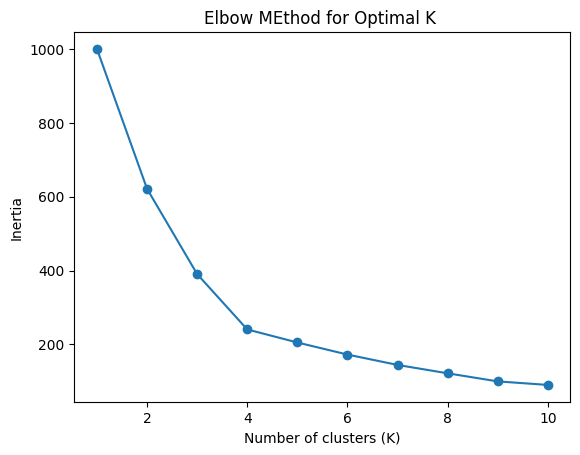

In [22]:
inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow MEthod for Optimal K ") 
plt.show()   

## **Apply K- Means**

In [31]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


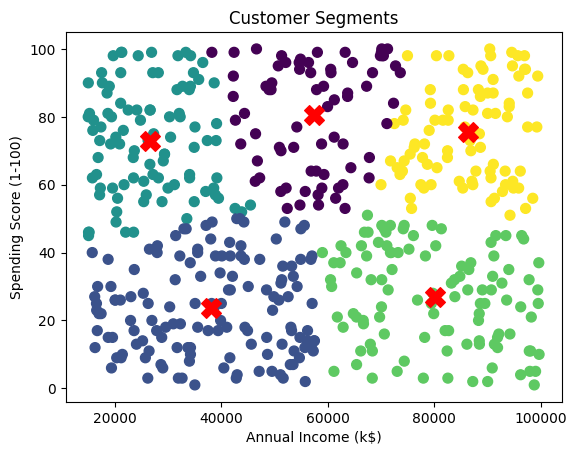

In [32]:
plt.scatter(X["Annual Income (USD)"], X["Spending Score (1-100)"],
            c=df["Cluster"], cmap="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:,0]*X["Annual Income (USD)"].std() + X["Annual Income (USD)"].mean(),
            kmeans.cluster_centers_[:,1]*X["Spending Score (1-100)"].std() + X["Spending Score (1-100)"].mean(),
            c="red", marker="X", s=200)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.show()

### **Real World Case Study : Image Compression**

In [37]:
!pip install scikit-image 

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 1.5 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/12.8 MB 1.9 MB/s eta 0:00:07
   ---- ----------------------------------- 1.6/12.8 MB 2.0 MB/s eta 0:00:06
   ------- -------------------------------- 2.4/12.8 MB 2.2 MB/s eta 0:00:05
   -------- ------------------------------- 2.6/12.8 MB 2.0 MB/s eta 0:00:06
   --------- ------------------------------ 2.9/12.8 MB 2.0 MB/s eta 0:00:05
   --------- ------------------------------ 2.9/12.8 MB 2.0 MB/s eta 0:00:05
   --------- ------------------------------ 3.1/12.8 MB 1.7 MB/s eta 0:00:06
   ----------- ---------------------------- 3.7/12.8 MB 1.7 MB/s eta 0:00:06
   ------------- -------------------------- 4.2/12.8 MB 1.8 MB/s eta 0:00:05
   -------------- --

In [38]:
from sklearn.utils import shuffle
from skimage import io
import numpy as np

In [40]:
image = io.imread("../images/images.jpeg") / 255.0
rows, cols, ch = image.shape
image_reshaped = image.reshape(rows*cols, ch)


In [49]:
# Apply K-Means
k = 4
kmeans= KMeans(n_clusters=k, random_state=42).fit(image_reshaped)
compressed =  kmeans.cluster_centers_[kmeans.labels_]
compressed_img = compressed.reshape(rows, cols, ch)

<function matplotlib.pyplot.show(close=None, block=None)>

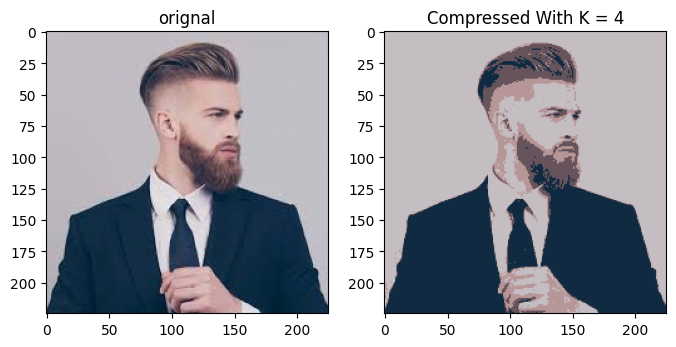

In [51]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(compressed_img)
plt.title("Compressed With K = 4")
plt.show